# First taste of CNN
## Read the data-Mnist

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('train data shape:{}'.format(x_train.shape))
print('test data shape:{}'.format(x_test.shape))

train data shape:(60000, 28, 28)
test data shape:(10000, 28, 28)


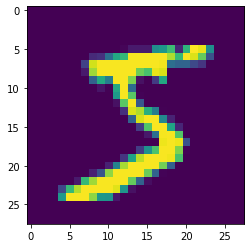

In [3]:
plt.imshow(x_train[0])
plt.show()

In [4]:
# reshape tensor to a shape, -1 is auto
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train.shape

(60000, 28, 28, 1)

## Build the model
### Convolution layer

In [5]:
model = keras.Sequential()

In [6]:
model.add(
    layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2],
                               x_train.shape[3]),
                  filters=32,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  padding='valid',
                  activation='relu'))

### Pooling layer

In [7]:
model.add(layers.MaxPool2D(pool_size=(2, 2)))

### Fully connection layer

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

In [9]:
# 分类层
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [11]:
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 24s 442us/sample - loss: 1.3377 - accuracy: 0.6130 - val_loss: 0.4772 - val_accuracy: 0.8987
Epoch 2/5
54000/54000 [==============================] - 24s 443us/sample - loss: 0.2905 - accuracy: 0.9241 - val_loss: 0.1719 - val_accuracy: 0.9578
Epoch 3/5
54000/54000 [==============================] - 26s 487us/sample - loss: 0.1355 - accuracy: 0.9628 - val_loss: 0.1165 - val_accuracy: 0.9705
Epoch 4/5
54000/54000 [==============================] - 26s 489us/sample - loss: 0.0982 - accuracy: 0.9725 - val_loss: 0.1329 - val_accuracy: 0.9693
Epoch 5/5
54000/54000 [==============================] - 27s 508us/sample - loss: 0.0843 - accuracy: 0.9755 - val_loss: 0.1143 - val_accuracy: 0.9718


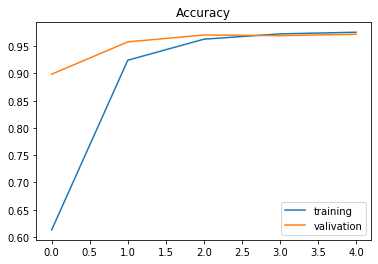

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['training', 'valivation'], loc='lower right')
plt.show()

## Evaluate the model

In [17]:
res = model.evaluate(x_test, y_test)
print('loss: {:.3f}, accuracy: {:.3f}'.format(res[0], res[1]))

10000/10000 [==============================] - 1s 67us/sample - loss: 0.1243 - accuracy: 0.9679
loss: 0.124, accuracy: 0.968
